## Breast Cancer Classifiers
Simple Notebook using Cancer dataset from [UCI Machine Learning Library](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/)
Below code implements different classification models that will classify Nucleus as malignant (harmful) or benign (not harmful):
1. Logistic Regression
2. Nearest Neighbor
3. Support Vector Machines
4. Kernel SVM
5. Naive Bayes
6. Decision Tree Algorithm
7. Random Forest Classification

<img src="images/Breast_Cancer_Begning_Malignant.png">

### 1- Introduction
The attribute informations are:

ID number
Diagnosis (M = malignant, B = benign)
3 - 32 Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)  
b) texture (standard deviation of gray-scale values)  
c) perimeter  
d) area  
e) smoothness (local variation in radius lengths)  
f) compactness (perimeter^2 / area - 1.0)  
g) concavity (severity of concave portions of the contour)  
h) concave points (number of concave portions of the contour)  
i) symmetry  
j) fractal dimension ("coastline approximation" - 1)  

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

### 2 - Preparing the data

In [4]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# importing our cancer dataset
dataset = pd.read_csv('./data/cancer.csv')
X = dataset.iloc[:, 1:31].values
Y = dataset.iloc[:, 31].values

In [6]:
# explore dataset
print("\n \tThe data frame has {0[0]} rows and {0[1]} columns. \n".format(dataset.shape))
#print("Cancer data set dimensions : {}".format(dataset.shape))

dataset.info()

dataset.head()



 	The data frame has 569 rows and 33 columns. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 no

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


As can bee seen above, except for the diagnosis (that is M = malignant or B = benign ) all other features are of type float64 and have 0 non-null numbers.

During the data set loading a extra column was created. We will use the code below to delete this entire column.

In [7]:
dataset.drop(dataset.columns[[-1, 0]], axis=1, inplace=True)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

Now we can count how many diagnosis are malignant (M) and how many are benign (B). This is done below.

In [8]:
diagnosis_all = list(dataset.shape)[0]
diagnosis_categories = list(dataset['diagnosis'].value_counts())

print("\n \t The data has {} diagnosis, {} malignant and {} benign.".format(diagnosis_all, 
                                                                            diagnosis_categories[0], 
                                                                            diagnosis_categories[1]))


 	 The data has 569 diagnosis, 357 malignant and 212 benign.


### 3 - Visualizing the data


To visualize the dataset, let us use the <a href='https://seaborn.pydata.org'>Seaborn</a> and <a href='https://matplotlib.org/'>Matplotlib</a> packages.

We are interested mainly in the mean values of the features, so we will separate those features in the list below in order to make some work easier and the code more readably.

In [9]:
features_mean= list(dataset.columns[1:11])

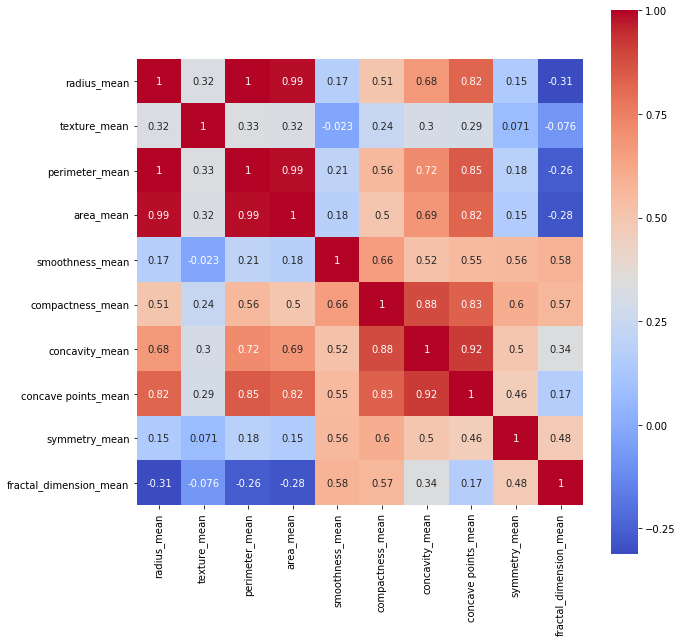

In [10]:
# using Seaborn to create a heat map of the correlations between the features.
plt.figure(figsize=(10,10))
sns.heatmap(dataset[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

It is also possible to create a scatter matrix with the features. The red dots correspond to malignant diagnosis and blue to benign. Look how in some cases reds and blues dots occupies different regions of the plots.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  after removing the cwd from sys.path.


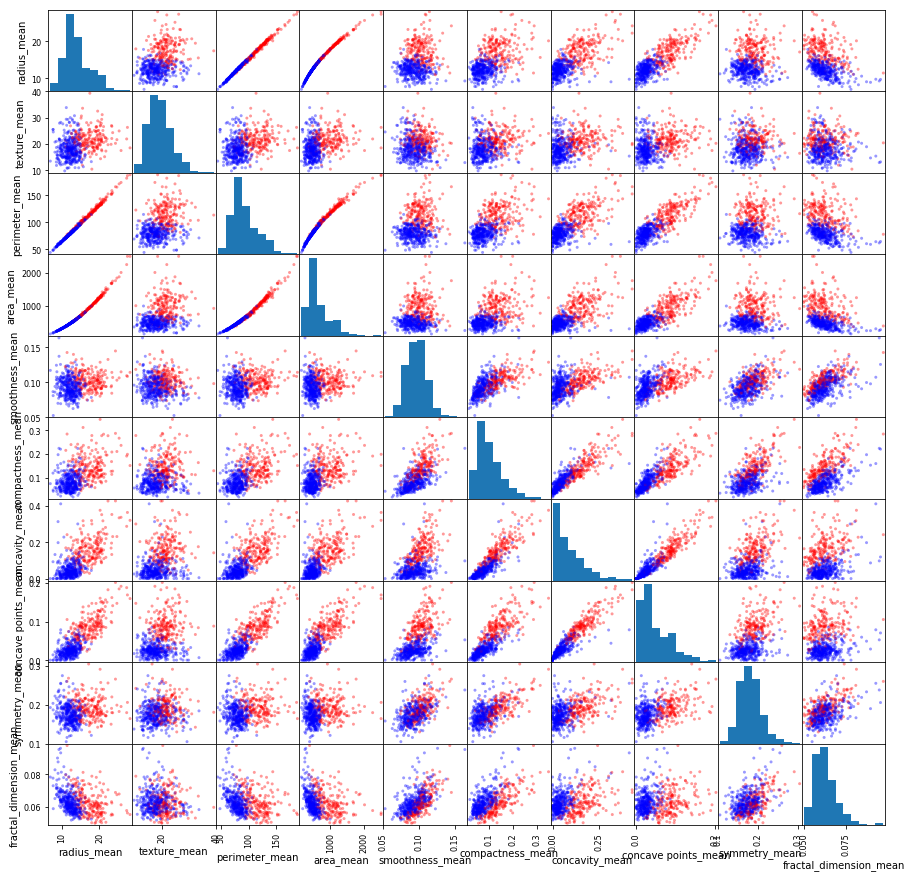

In [11]:
color_dic = {'M':'red', 'B':'blue'}
colors = dataset['diagnosis'].map(lambda x: color_dic.get(x))

sm = pd.scatter_matrix(dataset[features_mean], c=colors, alpha=0.4, figsize=((15,15)));

plt.show()

We can also see how the malignant or benign tumors cells can have (or not) different values for the features plotting the distribution of each type of diagnosis for each of the mean features.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


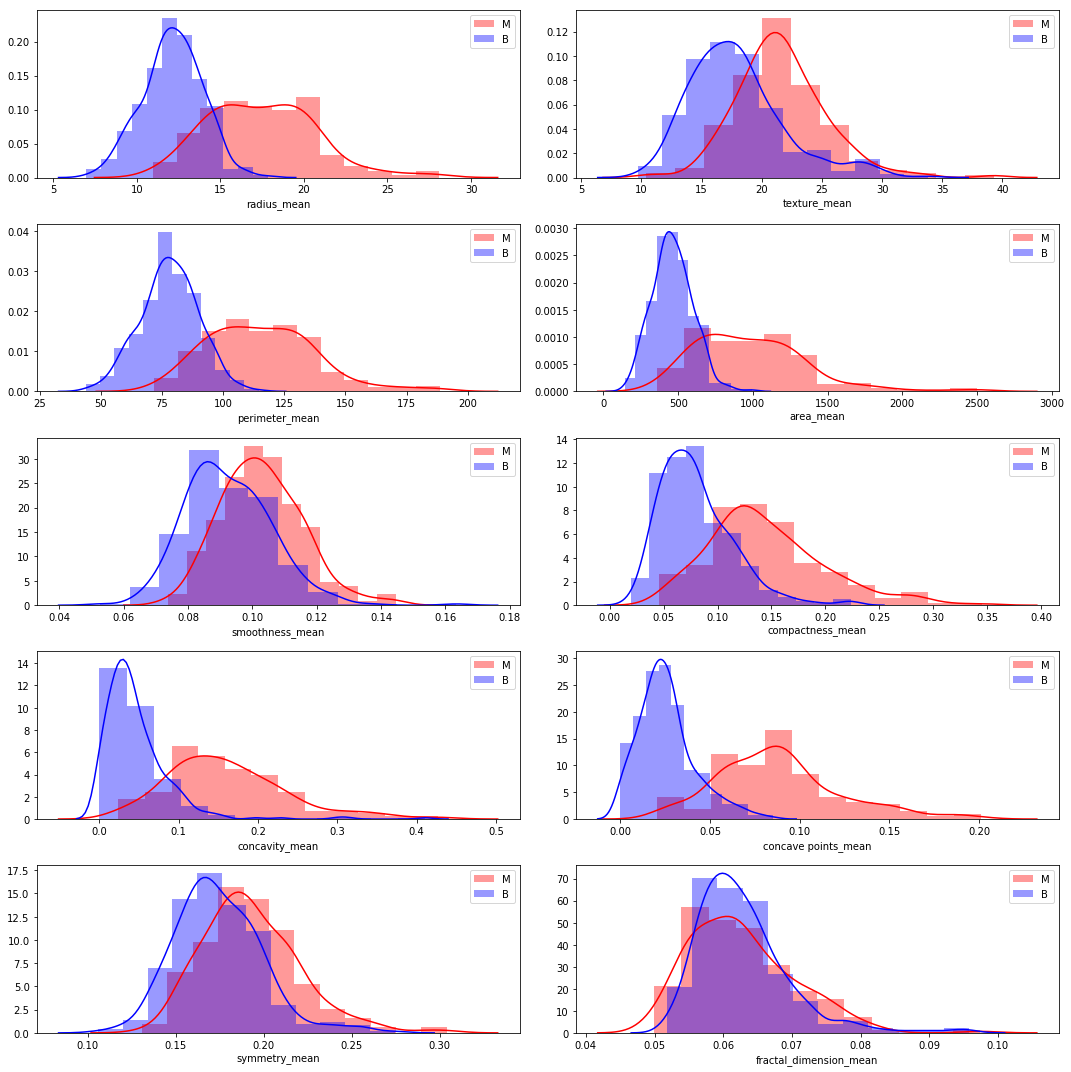

In [12]:
bins = 12
plt.figure(figsize=(15,15))
for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.distplot(dataset[dataset['diagnosis']=='M'][feature], bins=bins, color='red', label='M');
    sns.distplot(dataset[dataset['diagnosis']=='B'][feature], bins=bins, color='blue', label='B');
    
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

Still another form of doing this could be using box plots, which is done below.

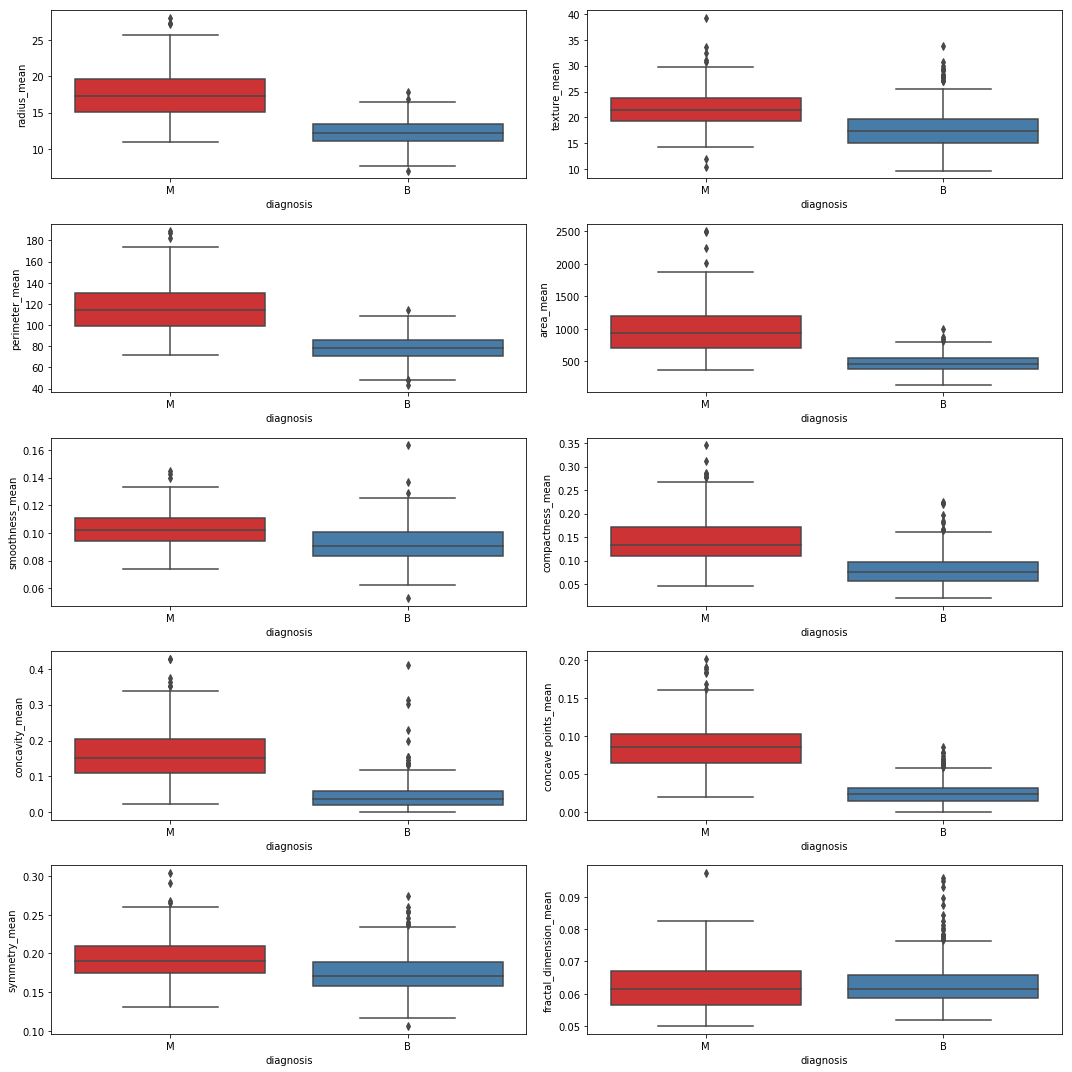

In [13]:
plt.figure(figsize=(15,15))
for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.boxplot(x='diagnosis', y=feature, data=dataset, palette="Set1")

plt.tight_layout()
plt.show()


As we saw above, some of the features can have, most of the times, values that will fall in some range depending on the diagnosis been malignant or benign. We will select those features to use in the next section.

In [14]:
# keep the 6 features that seem to best help predict the diagnosis
features_selection = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean']

### 4 - Machine Learning - using different classification models

The problem we are dealing with here is a classification problem. We will use the below ones and sww how they perform:
1. Logistic Regression
2. Nearest Neighbor
3. Support Vector Machines
4. Kernel SVM
5. Naïve Bayes
6. Decision Tree Algorithm
7. Random Forest Classification


In [15]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

import time

The algorithms will process only numerical values. For this reason, we will transform the categories M and B into values 1 and 0, respectively.

In [16]:
diag_map = {'M':1, 'B':0}
#dataset['diagnosis'] = dataset['diagnosis'].map(diag_map)
dataset['diagnosis'] = dataset['diagnosis'].apply(lambda x: 0 if x=='B' else 1)

print(dataset[15:22]['diagnosis'])



15    1
16    1
17    1
18    1
19    0
20    0
21    0
Name: diagnosis, dtype: int64


Our aim is to construct a "function" y = f(X) such that the value of y (1 or 0) will be determined once we input the values X into f. The "function" f will be construct by the machine learning algorithm based on the ys and Xs that are already known.


After training our machine learning algorithm we need to test its accuracy.  
In order to avoid Overfitting we will use the function *train_test_split* to split the data randomly (random_state = 109) into a train and a test set. The test set will correspond to 20% of the total data (test_size = 0.2).

In [17]:
X = dataset.loc[:, features_mean]
#X = dataset
y = dataset.loc[:, 'diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 109)

accuracy_all = []
cvs_all = []

Now we will use different methods of classificaton.
Steps:
 1. the classifier clf is initialized;  
 2. the classifier clf is fitted with the train data set X_train and y_train;  
 3. the predictions are found using X_test;  
 4. the accuracy is estimated with help of cross-validation;  
 5. the accuracy of the predictions is measured.  
 6. At the end the results are presents in %, along with the total time needed to run all the process.  



First Trying WITHOUT Hyper Parameters Tuning  
1-1,DesicionTree  
1-2,Randomforest  
1-3,SVM  
1-4,kNearestNeighbors  



In [29]:
#Without Hyper Parameters Tuning
#1-1,DesicionTree
#importing module
from sklearn.tree import DecisionTreeClassifier
#making the instance
start = time.time()
model = DecisionTreeClassifier(random_state=109)
#learning
model.fit(X_train, y_train)
#Prediction
prediction = model.predict(X_test)
end = time.time()

#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("DecisionTreeClassifier Accuracy:", metrics.accuracy_score(prediction, y_test))
#evaluation(Confusion Matrix)
print("DecisionTreeClassifier Confusion Matrix:\n", metrics.confusion_matrix(prediction, y_test))
print("Execution time: {0:.5} seconds \n".format(end-start))


DecisionTreeClassifier Accuracy: 0.9385964912280702
DecisionTreeClassifier Confusion Matrix:
 [[71  4]
 [ 3 36]]
Execution time: 0.005208 seconds 



In [30]:
#Without Hyper Parameters Tuning
#1-2,Randomforest
#importing module
from sklearn.ensemble import RandomForestClassifier
#making the instance
model = RandomForestClassifier(n_jobs=-1, random_state=109)
#learning
model.fit(X_train, y_train)
#Prediction
prediction=model.predict(X_test)

#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("RandomForestClassifier Accuracy:", metrics.accuracy_score(prediction, y_test))
#evaluation(Confusion Matrix)
print("RandomForestClassifier Confusion Matrix:\n", metrics.confusion_matrix(prediction, y_test))
print("Execution time: {0:.5} seconds \n".format(end-start))


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier Accuracy: 0.9736842105263158
RandomForestClassifier Confusion Matrix:
 [[73  2]
 [ 1 38]]
Execution time: 0.005208 seconds 



In [31]:
#Without Hyper Parameters Tuning
#1-3,SVM
#importing module
from sklearn import svm
#making the instance
model = svm.SVC(random_state=109)
#learning
model.fit(X_train, y_train)
#Prediction
prediction=model.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("SVM Accuracy:", metrics.accuracy_score(prediction, y_test))
#evaluation(Confusion Matrix)
print("SVM Confusion Matrix:\n", metrics.confusion_matrix(prediction, y_test))
print("Execution time: {0:.5} seconds \n".format(end-start))


SVM Accuracy: 0.6578947368421053
SVM Confusion Matrix:
 [[69 34]
 [ 5  6]]
Execution time: 0.005208 seconds 



/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [32]:
#Without Hyper Parameters Tuning
#1-4,kNearestNeighbors
#importing module
from sklearn.neighbors import KNeighborsClassifier
#making the instance
model = KNeighborsClassifier(n_jobs=-1)
#learning
model.fit(X_train, y_train)
#Prediction
prediction=model.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("KNeighborsClassifier Accuracy:", metrics.accuracy_score(prediction, y_test))
#evaluation(Confusion Matrix)
print("KNeighborsClassifier Confusion Matrix:\n", metrics.confusion_matrix(prediction, y_test))
print("Execution time: {0:.5} seconds \n".format(end-start))


KNeighborsClassifier Accuracy: 0.9210526315789473
KNeighborsClassifier Confusion Matrix:
 [[69  4]
 [ 5 36]]
Execution time: 0.005208 seconds 



Now trying WITH Hyper Parameters Tuning  
2-1,DesicionTree  
2-2,Randomforest  
2-3,SVM  
2-4,kNearestNeighbors  

In [35]:
#With Hyper Parameters Tuning
#2-1,DesicionTree
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
#making the instance
model = DecisionTreeClassifier(random_state=109)
#Hyper Parameters Set
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[109]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model1.fit(X_train, y_train)
#The best hyper parameters set
print("GridSearchCV Best Hyper Parameters:", model1.best_params_)
#Prediction
prediction = model1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("GridSearchCV Accuracy with Hyper parameters tuning:", metrics.accuracy_score(prediction, y_test))
#evaluation(Confusion Matrix)
print("GridSearchCV Confusion Matrix:\n", metrics.confusion_matrix(prediction, y_test))
print("Execution time: {0:.5} seconds \n".format(end-start))


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV Best Hyper Parameters: {'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 109}
GridSearchCV Accuracy with Hyper parameters tuning: 0.9298245614035088
GridSearchCV Confusion Matrix:
 [[71  5]
 [ 3 35]]
Execution time: 0.005208 seconds 



In [34]:
#With Hyper Parameters Tuning
#2-2,Randomforest
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#making the instance
model = RandomForestClassifier()
#hyper parameters set
params = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#learning
model1.fit(X_train, y_train)
#The best hyper parameters set
print("RandomForestClassifier Best Hyper Parameters:\n", model1.best_params_)
#Prediction
prediction=model1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("RandomForestClassifier Accuracy:", metrics.accuracy_score(prediction, y_test))
#evaluation(Confusion Matrix)
print("RandomForestClassifier Confusion Matrix:\n", metrics.confusion_matrix(prediction, y_test))
print("Execution time: {0:.5} seconds \n".format(end-start))


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RandomForestClassifier Best Hyper Parameters:
 {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 25, 'n_jobs': -1, 'random_state': 123}
RandomForestClassifier Accuracy: 0.9649122807017544
RandomForestClassifier Confusion Matrix:
 [[72  2]
 [ 2 38]]


In [36]:
#With Hyper Parameters Tuning
#2-3,SVM
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn import svm
#making the instance
model = svm.SVC()
#Hyper Parameters Set
params = {'C': [6,7,8,9,10,11,12], 
          'kernel': ['linear','rbf']}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model1.fit(X_train, y_train)
#The best hyper parameters set
print("SVM Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction = model1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("SVM Accuracy:", metrics.accuracy_score(prediction, y_test))
#evaluation(Confusion Matrix)
print("SVM Confusion Matrix:\n", metrics.confusion_matrix(prediction, y_test))
print("Execution time: {0:.5} seconds \n".format(end-start))


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


SVM Best Hyper Parameters:
 {'C': 8, 'kernel': 'linear'}
SVM Accuracy: 0.9210526315789473
SVM Confusion Matrix:
 [[70  5]
 [ 4 35]]
Execution time: 0.005208 seconds 



In [ ]:
#With Hyper Parameters Tuning
#2-4,kNearestNeighbors
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#making the instance
model = KNeighborsClassifier(n_jobs=-1)
#Hyper Parameters Set
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=1)
#Learning
model1.fit(X_train, y_train)
#The best hyper parameters set
print("KNeighborsClassifier Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction = model1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("KNeighborsClassifier Accuracy:",metrics.accuracy_score(prediction, y_test))
#evaluation(Confusion Matrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction, y_test))

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
